# Importing libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas.api.types import CategoricalDtype

# Import Datasets

In [89]:
dailyactivity = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 2/Bellabeat/Dataset/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [90]:
dailyactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

# Data Cleaning

In [91]:
#creating a backup
dailyactivity.to_csv('dailyactivity.csv')

In [92]:
dailyactivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [93]:
# finding missing values
dailyactivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

There is no missing value

In [94]:
dailyactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

From the info above, you can see that ActivityDate column is object Dtype instead of datetime64 as it should be

In [95]:
#Counting unique ID
len(pd.unique(dailyactivity['Id']))

33

In [96]:
#changing name of columns into lowercase
dailyactivity.columns = dailyactivity.columns.str.lower()
dailyactivity

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


As you can see, there are 33 unique ids instead of 30 as it should be.

In [97]:
#changing dtype of ActivityDate column
dailyactivity['activitydate'] = pd.to_datetime(dailyactivity['activitydate'],format='%m/%d/%Y')
dailyactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        940 non-null    int64         
 1   activitydate              940 non-null    datetime64[ns]
 2   totalsteps                940 non-null    int64         
 3   totaldistance             940 non-null    float64       
 4   trackerdistance           940 non-null    float64       
 5   loggedactivitiesdistance  940 non-null    float64       
 6   veryactivedistance        940 non-null    float64       
 7   moderatelyactivedistance  940 non-null    float64       
 8   lightactivedistance       940 non-null    float64       
 9   sedentaryactivedistance   940 non-null    float64       
 10  veryactiveminutes         940 non-null    int64         
 11  fairlyactiveminutes       940 non-null    int64         
 12  lightlyactiveminutes  

In [98]:
# check for any duplicated values
dailyactivity.duplicated().any()

False

In [99]:
#creating day_name column
dailyactivity['day_name'] = dailyactivity['activitydate'].dt.day_name()
dailyactivity

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,day_name
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Sunday
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Monday
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Tuesday
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Wednesday


# Analysis

In [100]:
#Calculate the total excercise minutes
dailyactivity['total_min'] = dailyactivity['veryactiveminutes'] + dailyactivity['fairlyactiveminutes'] + dailyactivity['lightlyactiveminutes'] + dailyactivity['sedentaryminutes']

In [101]:
#Caculate the total excercise hours
dailyactivity['total_hour'] = round(dailyactivity['total_min']/60)

In [102]:
dailyactivity

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,day_name,total_min,total_hour
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Tuesday,1094,18.0
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Wednesday,1033,17.0
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Thursday,1440,24.0
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Friday,998,17.0
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,Saturday,1040,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Sunday,1440,24.0
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Monday,1440,24.0
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Tuesday,1440,24.0
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Wednesday,1440,24.0


In [103]:
dailyactivity.describe()

,id,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,total_min,total_hour
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


* From the table above you can see:
    - The average of total step and distance of users is about 7637 steps and 5.4 KM respectively.
    - Most of the users is sendentary users, using the app on average 991 minutes.
    - The average of calories burned is 2303.

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**calculate the mode of the day_name**

In [104]:
#calculate the mode of the day_name
mode_of_dayname = dailyactivity['day_name'].mode()
mode_of_dayname

0    Tuesday
Name: day_name, dtype: object

**The day users use the app the most is on Tuesday.**

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**calculated the number of users using app in a week**

In [105]:
# sort day_name
dailyactivity['day_name'] = dailyactivity.day_name.astype(CategoricalDtype(categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'],ordered=True))
dailyactivity['day_name'].unique()

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [106]:
#calculated the number of users using app in a week
count_users = dailyactivity.groupby('day_name')['id'].count()
count_users.sort_index()

day_name
Sunday       121
Monday       120
Tuesday      152
Wednesday    150
Thursday     147
Friday       126
Saturday     124
Name: id, dtype: int64

**The users use app the most during midweek.**

# VISUALIZTION

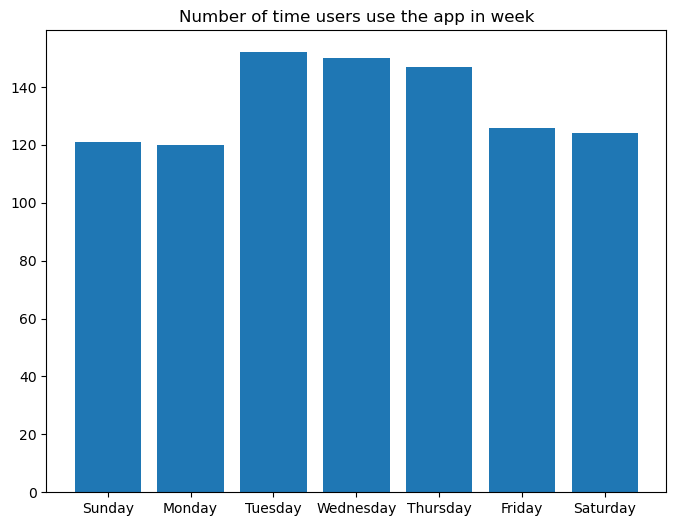

In [108]:
plt.figure(figsize = (8,6))
plt.bar(count_users.index,count_users.values)
plt.title('Number of time users use the app in week')
plt.show()

([<matplotlib.patches.Wedge at 0x22d0b53d610>,
 [Text(1.0983633515717721, 0.059982896929240755, 'Very active minutes'),
  Text(1.0886022147551395, 0.1579405522030527, 'Fairly active minutes'),
  Text(0.8580470838875357, 0.6882987736674362, 'Lightly active minutes'),
  Text(-0.9161475838727016, -0.6088297007901401, 'Sedentary minutes')],
 [Text(0.5991072826755119, 0.03271794377958586, '1.7%'),
  Text(0.5937830262300761, 0.086149392110756, '1.1%'),
  Text(0.4680256821204739, 0.3754356947276924, '15.8%'),
  Text(-0.4997168639305644, -0.33208892770371273, '81.3%')])

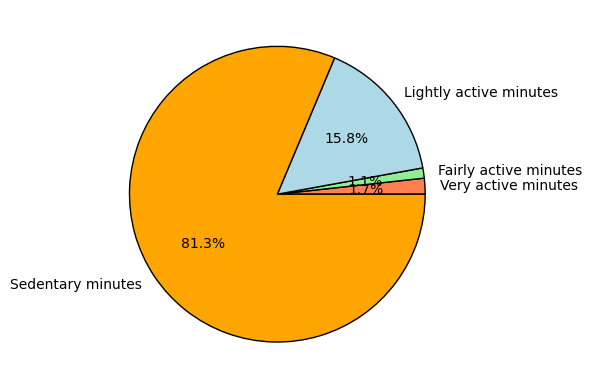

In [127]:
very_active_mins = dailyactivity["veryactiveminutes"].sum()
fairly_active_mins = dailyactivity["fairlyactiveminutes"].sum()
lightly_active_mins = dailyactivity["lightlyactiveminutes"].sum()
sedentary_mins = dailyactivity["sedentaryminutes"].sum()
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["coral", "lightgreen", "lightblue", "orange"]
plt.pie(slices, labels = labels, wedgeprops = {"edgecolor": "black"},colors = colours, autopct = "%1.1f%%")

**From pie chart above you can see that the majority of users's app usage is sendentary, taking 81.3% of the total time.**
    

# Conclusion

Question
1. **What are some trends in smart device usage?**  
        - Most of users (81.3%) are using the FitBit app to track sedentary activities so that means they don't use the app for the active excercise that much.\
        - The users use the app the most during midweek, with Tuesday being the primary day of usage.
2. **How could these trends apply to Bellabeat customers?**  
          Both Fitbit and Bellabeat are the company that create product focus on women's health so Fitbit's data and trends can be apply to Bellabeat as well.
3. **How could these trends help influence Bellabeat marketing strategy?**  
          These trends can help Bellabeat observe the behavior of users from other women's health-focused company and leverage that knowledge to enhance their own products.
        

Insights
* The users use the app the most during midweek, with Tuesday being the primary day of usage.
* The majority of users's app usage is sendentary, taking 81.3% of the total time.

Recommendations
* Based on the percentage of FitBit app usage, it is evident that 81.3% of users utilize the app to track sedentary activities so Bellabeat should prioritize the development of products related to sedentary activities.
* Based on the insight that users of the FitBit app are most active during the midweek, Bellabeat should consider launching promotions to encourage more people to use their app during the weekend.